<a href="https://colab.research.google.com/github/TusharGwal/Machine-Learning/blob/main/Association_Rule_Learning/apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apriori

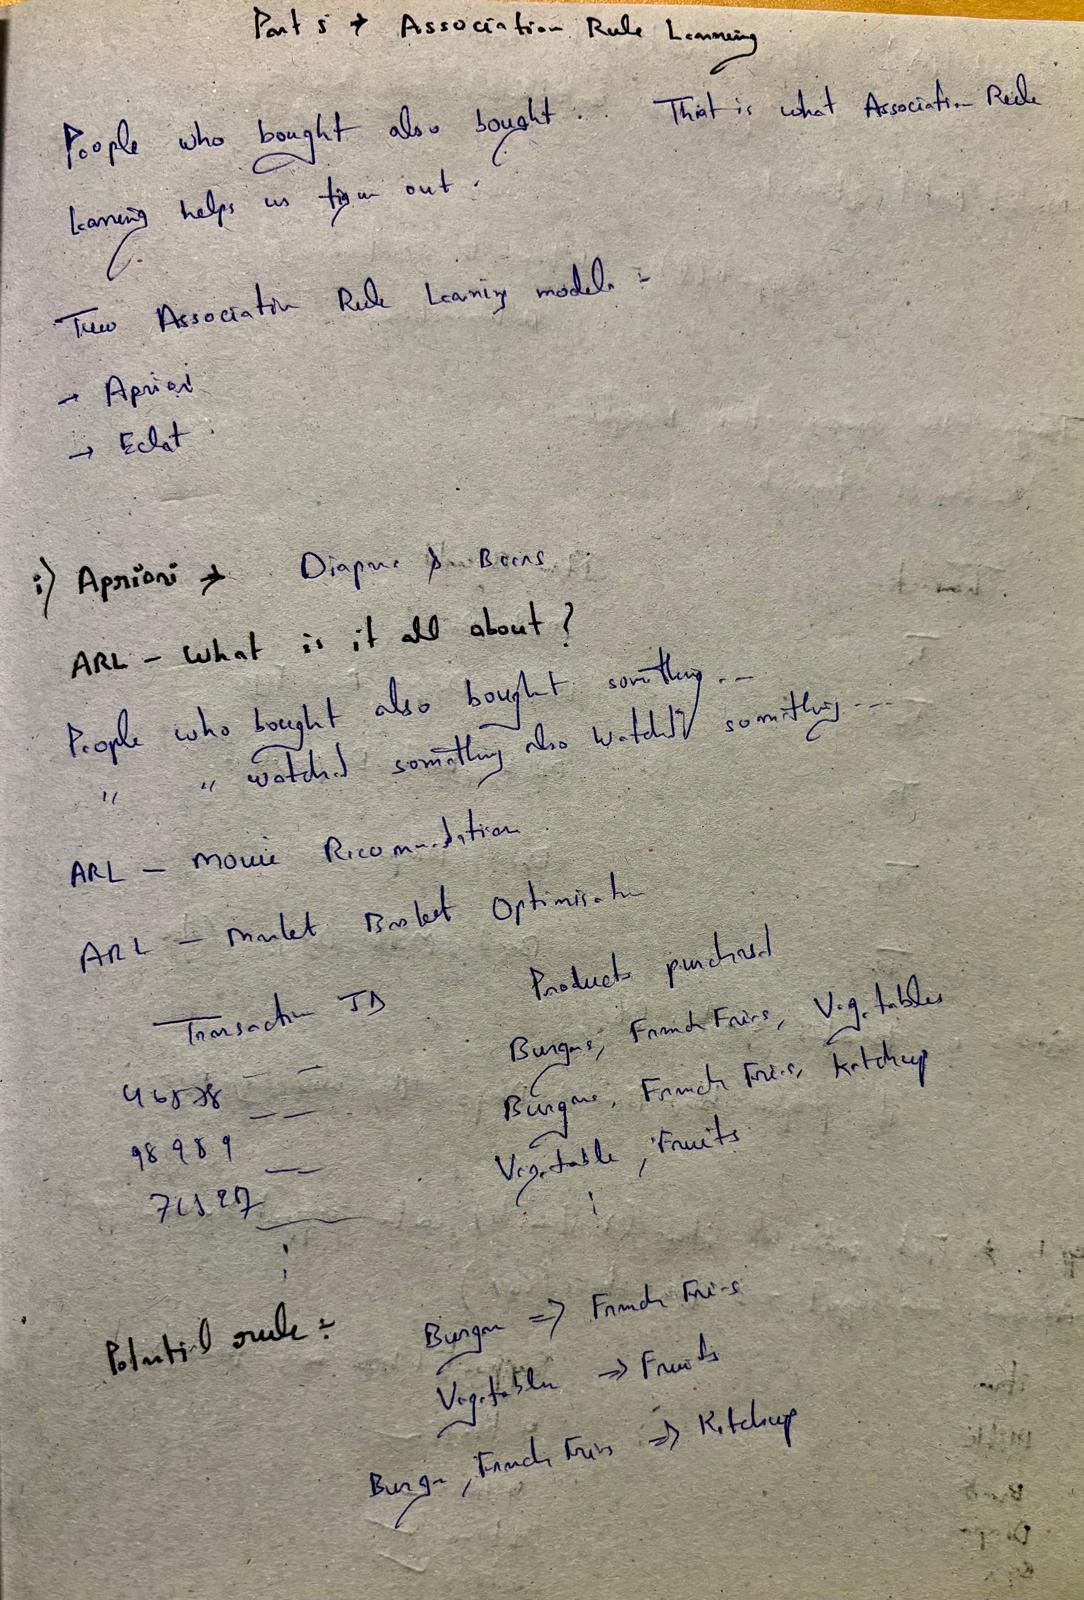

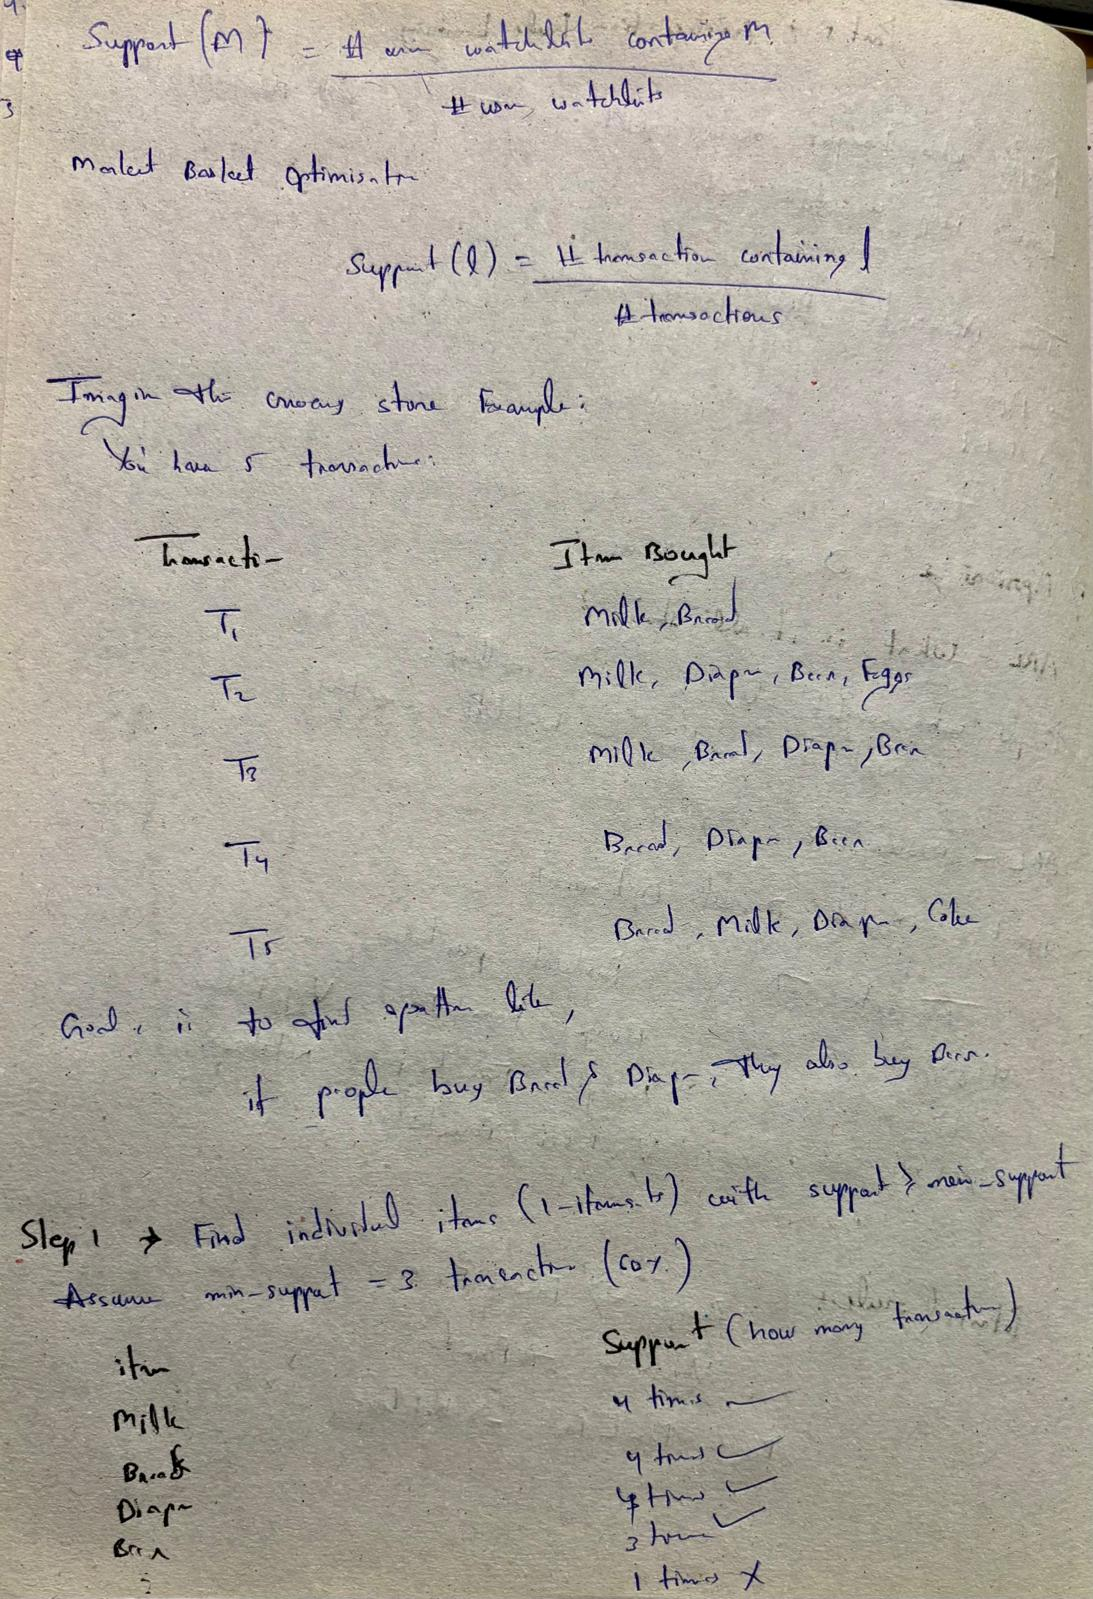

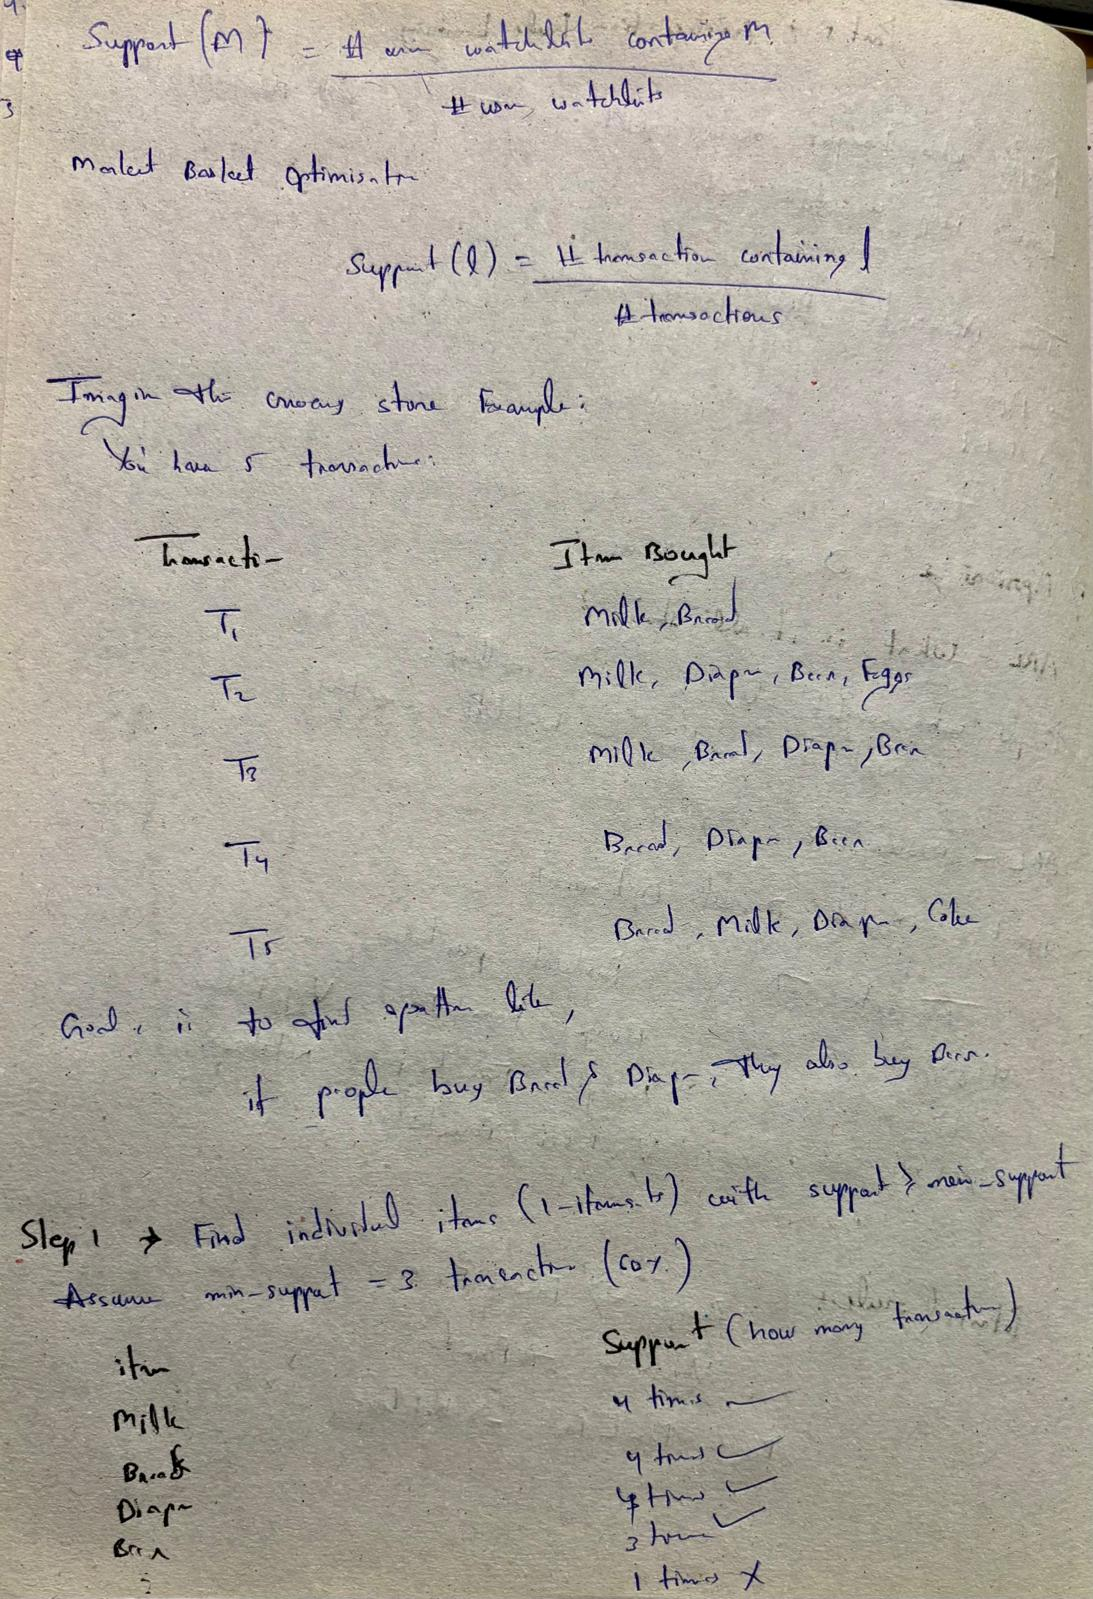

## Importing the libraries

In [1]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=1373d00468ac4f219cdf9f3f48fed31de7978f11df2d22ee8196c98a149834b2
  Stored in directory: /root/.cache/pip/wheels/77/3d/a6/d317a6fb32be58a602b1e8c6b5d6f31f79322da554cad2a5ea
Successfully built apyori


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data Preprocessing

In [3]:
dataset = pd.read_csv('Market_Basket_Optimisation.csv', header = None)
transactions = []
for i in range(0, 7501):
  transactions.append([str(dataset.values[i,j]) for j in range(0, 20)])

Apriori expects list

In [4]:
print(transactions)

[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['chutney', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['turkey', 'avocado', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['low fat yogurt', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan

## Training the Apriori model on the dataset

In [5]:
from apyori import apriori
rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)

Great question, Tushar! 🔍
**Apriori** is one of the most famous algorithms used in **association rule mining**, especially in **market basket analysis** (e.g., Amazon, grocery stores, etc.).

Let’s break it down clearly and visually:

---

## 🧠 What is Apriori Algorithm?

> Apriori finds **frequent itemsets** in transactional data and derives **association rules** from them.

**Example:**

> If people buy **bread and butter**, they also buy **jam** → (`bread, butter → jam`)

---

## 🧾 Real-Life Use Case

| Transaction ID | Items Bought              |
| -------------- | ------------------------- |
| 1              | Milk, Bread               |
| 2              | Milk, Diaper, Beer, Eggs  |
| 3              | Milk, Bread, Diaper, Beer |
| 4              | Bread, Milk, Diaper, Beer |
| 5              | Bread, Milk, Diaper, Coke |

Apriori can help us discover patterns like:

> "If Milk and Diaper, then Beer"
> "If Bread, then Milk"

---

## 🔄 Step-by-Step How Apriori Works

### ✅ Step 1: Define Thresholds

* **Support**: How frequently an itemset appears in the dataset
* **Confidence**: How often rule is true (e.g., if A, how often B?)
* **Lift**: How much more likely B is given A, compared to random chance

---

### ✅ Step 2: Generate Frequent Itemsets

1. **Start with 1-item sets**

   * Find all items with **support ≥ min\_support**
2. **Generate 2-item sets** from frequent 1-item sets

   * Keep those with support ≥ threshold
3. **Generate 3-item sets**, and so on...

This is called the **Apriori principle**:

> If an itemset is frequent, **all its subsets must also be frequent**.
> So we **prune** combinations early to save time.

---

### ✅ Step 3: Generate Association Rules

From frequent itemsets, create rules like:

```
{Milk, Diaper} → {Beer}
```

And compute:

* **Support**
* **Confidence**
* **Lift**

---

## 📊 Example:

From dataset:

```plaintext
Transaction 1: Milk, Bread
Transaction 2: Milk, Bread, Diaper
Transaction 3: Bread, Diaper, Beer
```

If `Bread + Diaper` occurs in 2 of 3 transactions → **support = 66%**

If every time `Bread & Diaper` occur, `Beer` also occurs → **confidence = 100%**

If `Beer` appears randomly in 50% of transactions, then:

$$
\text{Lift} = \frac{Confidence}{Support(Beer)} = \frac{1.0}{0.5} = 2.0
$$

➡️ That’s a **strong rule**!

---

## 🔧 In Python (using `mlxtend`):

```python
from mlxtend.frequent_patterns import apriori, association_rules

# Assume you have a one-hot encoded DataFrame `df`
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
```

---

## ✅ Summary

| Concept        | Description                                                    |
| -------------- | -------------------------------------------------------------- |
| **Support**    | How often the rule appears in data                             |
| **Confidence** | How often B occurs when A occurs                               |
| **Lift**       | Measure of rule strength (Lift > 1 = good)                     |
| **Apriori**    | Iteratively finds frequent itemsets and builds rules from them |

---

No worries, Tushar! Let's slow it down and use a **very simple real-life example** to explain the **Apriori Algorithm** from scratch.

---

## 🧾 Imagine This Grocery Store Example:

You have 5 transactions:

| Transaction | Items Bought              |
| ----------- | ------------------------- |
| T1          | Milk, Bread               |
| T2          | Milk, Diaper, Beer, Eggs  |
| T3          | Milk, Bread, Diaper, Beer |
| T4          | Bread, Diaper, Beer       |
| T5          | Bread, Milk, Diaper, Coke |

---

## 💡 GOAL:

> Find **patterns** like:
> “If people buy Bread and Diaper, they also buy Beer.”

---

## 🧠 Step-by-step Apriori:

### 🔹 Step 1: Find **individual items** (1-itemsets) with **Support ≥ min\_support**

Assume `min_support = 3 transactions (60%)`

| Item   | Support (how many transactions) |
| ------ | ------------------------------- |
| Milk   | 4 times ✅                       |
| Bread  | 4 times ✅                       |
| Diaper | 4 times ✅                       |
| Beer   | 3 times ✅                       |
| Eggs   | 1 time ❌                        |
| Coke   | 1 time ❌                        |

➡️ Keep only **Milk, Bread, Diaper, Beer**

---

### 🔹 Step 2: Make **2-itemsets** from frequent items

Try all combinations:

* Milk & Bread → appears in T1, T3, T5 → ✅ (3 times)
* Milk & Diaper → T2, T3, T5 → ✅ (3 times)
* Bread & Diaper → T3, T4, T5 → ✅ (3 times)
* Diaper & Beer → T2, T3, T4 → ✅ (3 times)
* Bread & Beer → T3, T4 → ❌ (2 times)

➡️ Drop pairs with low support

---

### 🔹 Step 3: Make **3-itemsets** (from frequent 2-itemsets)

Example: Bread + Diaper + Beer
Appears in T3, T4 → Support = 2 ❌

Nothing else passes the minimum support.

---

### 🔹 Step 4: Generate **rules**

Now from frequent sets, make rules like:

**Rule**:
👉 If someone buys **Bread + Diaper**, then they likely buy **Beer**

#### Metrics:

* **Support** = 3/5 = 60%
* **Confidence** = (Bread+Diaper+Beer) / (Bread+Diaper) = 2/3 = 66.7%
* **Lift** = Confidence / Support of Beer = 0.667 / 0.6 = **1.11** (a little better than random)

---

## ✅ Apriori Summary:

| Step | What Happens                                       |
| ---- | -------------------------------------------------- |
| 1️⃣  | Count how often each item appears                  |
| 2️⃣  | Keep only frequent ones (above support threshold)  |
| 3️⃣  | Combine them into bigger itemsets                  |
| 4️⃣  | Generate rules like: “If A, then B”                |
| 5️⃣  | Keep only strong rules (using confidence and lift) |

---

## 📦 Example Rule

```
RULE:
If Bread and Diaper → Then Beer

Because:
- It happens often (support)
- It’s usually true (confidence)
- It’s stronger than chance (lift)
```

---


Great follow-up, Tushar! You're asking **why Apriori calculates confidence and lift in the last (3rd or final) subset** — meaning after frequent itemsets are found. Let's clarify that with logic:

---

## 🤔 Why Not Calculate Confidence & Lift From the Start?

Because:

* **Confidence and Lift are calculated on rules**, not on raw itemsets.
* But before you can generate **rules**, you need to first know **which itemsets are frequent** — otherwise, you’d waste time calculating useless rules.

---

## 🔄 Step-by-Step Logic of Apriori:

### 🔹 Step 1: Find frequent itemsets (using **support only**)

👉 Find which combinations (e.g., `bread, milk`) occur frequently (e.g., ≥ 60%)

### 🔹 Step 2: From those frequent itemsets, **create rules**

👉 Example from {Bread, Milk}:
Possible rules:

* Bread → Milk
* Milk → Bread

Now we calculate:

* **Confidence**: "How often Milk appears when Bread does?"
* **Lift**: "Is this better than chance?"

---

## 📌 Why wait till Step 3?

Because:

* You **don't need to calculate confidence or lift** for itemsets that are **not frequent**.
* Doing so would be **computationally expensive** (tons of item combinations)
* Apriori **prunes** the search space early using the **Apriori Principle**:

  > “If a set isn’t frequent, its supersets can’t be either.”

So once Apriori **narrows down to meaningful itemsets**, **only then** does it:

1. Try different **rules** from each itemset
2. Check which ones meet **confidence/lift thresholds**
3. Return only **strong rules**

---

## ✅ Final Analogy:

Imagine you're looking for interesting movie pairs:

* First, you look at combinations people **often watch together** (support)
* Then, from those frequent combinations, you try to say:

  > "If they watch X, do they usually watch Y?" (confidence)
  > "Is that more than just a coincidence?" (lift)

You wouldn’t want to analyze rare combos like `Alien + Barbie`, right? 🙃


## Visualising the results

### Displaying the first results coming directly from the output of the apriori function

In [6]:
results = list(rules)

In [7]:
results

[RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

### Putting the results well organised into a Pandas DataFrame

In [8]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

### Displaying the results non sorted

In [9]:
resultsinDataFrame

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,light cream,chicken,0.004533,0.290598,4.843951
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
2,pasta,escalope,0.005866,0.372881,4.700812
3,fromage blanc,honey,0.003333,0.245098,5.164271
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
6,light cream,olive oil,0.003200,0.205128,3.114710
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
8,pasta,shrimp,0.005066,0.322034,4.506672


### Displaying the results sorted by descending lifts

In [10]:
resultsinDataFrame.nlargest(n = 10, columns = 'Lift')

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
3,fromage blanc,honey,0.003333,0.245098,5.164271
0,light cream,chicken,0.004533,0.290598,4.843951
2,pasta,escalope,0.005866,0.372881,4.700812
8,pasta,shrimp,0.005066,0.322034,4.506672
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
6,light cream,olive oil,0.003200,0.205128,3.114710


Perfect, Tushar — you're showing a classic **Association Rule table** with:

* **Left Hand Side (LHS)**: Antecedent (what the customer bought)
* **Right Hand Side (RHS)**: Consequent (what often follows)
* **Support**: How often this rule appears in the dataset
* **Confidence**: How often RHS occurs when LHS is bought
* **Lift**: How much more likely RHS is, compared to chance

Let’s now **analyze this like a data scientist**. 🧠📊

---

## 🔍 Step-by-Step Analysis

### 1. **Sort by Lift (already sorted!)**

Higher **Lift** → Stronger the association.
Lift > 1 = better than chance.
Lift > 3 = **very strong**.

📌 **Top rule:**

* 🧀 `fromage blanc → honey`
* **Lift = 5.16** → Buying “fromage blanc” makes “honey” purchase **5× more likely**
* Though **support is low (0.3%)**, this is a **niche but strong rule** — good for **cross-selling**

---

### 2. **Balance Between Support & Confidence**

Let’s look at **high confidence rules** that are also seen often.

📌 Example:

* 🍝 `pasta → escalope`

  * **Support = 0.0059 (0.59%)**
  * **Confidence = 0.3728 (37.28%)**
  * **Lift = 4.7**

➡️ This means:

> When someone buys **pasta**, there's a 37% chance they also buy **escalope**, and it's 4.7× more likely than random.

That’s **both actionable and fairly frequent**. Great for:

* Bundle recommendations
* Combo meal promotions

---

### 3. **Identify Redundancy or Similar Rules**

Check for repeated LHS or RHS:

* `light cream → chicken`
* `light cream → olive oil`

🧠 Insight:

> “Light cream” buyers may be more likely to cook richer meals (chicken, olive oil).

Can be used to build a **cream-based recipe recommender**.

---

### 4. **Check for High Support (Wider Reach)**

📌 Rule:

* `herb & pepper → ground beef`

  * **Support = 1.6%**
  * Confidence = 32.3%
  * Lift = 3.29

➡️ This rule reaches **more users** (higher support), still strong.
Good for a **mainstream offer** or **homepage suggestion**.

---

## 🎯 Strategy Suggestions:

| Use Case                    | Rules to Pick                                                      |
| --------------------------- | ------------------------------------------------------------------ |
| **Niche upsell/cross-sell** | High lift, low support (e.g., `fromage blanc → honey`)             |
| **Mass promotions**         | Moderate lift + high support (e.g., `herb & pepper → ground beef`) |
| **Personalized offers**     | High confidence (e.g., `pasta → escalope`)                         |
| **Bundle creation**         | Common patterns with confidence > 30%                              |

---

## ✅ TL;DR Insights (like a data scientist would write):

> 💡 Customers who buy **pasta** are 4.7x more likely to buy **escalope** — bundle it or suggest it at checkout.

> 🔍 **Light cream** is a frequent trigger for recipes — show chicken or olive oil as suggestions.

> 🧠 **Fromage blanc → honey** has extremely high lift — suggest this pair in premium/niche product categories.

---
